# (Used Cars Prices)
## by (Ali Said Daebis)





## Introduction
- MY dataset contian data about prices of Used cars in india and there are indicators like Kilometers_Driven and Engine size   that will contribute on the car's price
- For my analysis I will use features like  Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine size to know the prices for the cars 

- some question that I will answer:
- what are the main factors associated with the car price?
- Is there any relation between the location and car's price ?
- what are the main factors associated with the car Mileage ?
- which car u shoiul buy and which car u shouldn't


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

## Data Gathering 

In [2]:
df=pd.read_csv("train-data.csv")


## Data Assessing

In [3]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
df.shape

(6019, 13)

In [7]:
df.duplicated().sum()

0

### Quality 
- I wont use New_Price & power columns in my analysis,so I will drop them
- I will only deal with just brands not the name of the vehicle so I will remove the names from the car's brand and make a new column contains the brand then i will drop the name column
- i will drop all NaN values in the dataset
- There are rows in Mileage by km/kg so i will make all in kmpl instead and store them in a new column called Mileage(kmpl) , then i will change the datatype
- I will rename Engine to Engine(CC) then i will change the datatype.
- I will change the idian currancy to be US dollar

## Cleaning

In [8]:
df_new=df.copy()


In [9]:
df_new.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Define
- Drop New_Price & power columns

### Code

In [10]:
df_new.drop(["New_Price","Power"],axis=1,inplace=True)

### Test

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 517.4+ KB


### Define
- Split the brand from the name of the car into a new column called Brand, then drop the original column

### Code

In [12]:
df_new["Brand"]=df_new["Name"].map(lambda x:x.split(' ')[0])
df_new.drop("Name",axis=1,inplace=True)

### Test

In [13]:
df_new.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,5.0,17.74,Audi


### Define 
- Drop all null values in the dataframe

### Code

In [14]:
df_new.dropna(inplace=True)

### Test

In [15]:
df_new.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Seats                0
Price                0
Brand                0
dtype: int64

In [16]:
df_new.shape

(5975, 11)

### Define
- Convert all Mileage to be in kmpl then store them in a new column called Mileage(kmpl) then drop the original one

### Code

In [17]:
# i use for loop to loop on all values in mileage column with km/kg to make it kmpl 
Mileage_kmpl=[]
for i in (df_new.Mileage):
    if str(i).endswith("km/kg"):
        i=i[:-6]
        i=float(i)*1.35
        Mileage_kmpl.append(float(i))
    elif str(i).endswith("kmpl"):
        i=i[:-5]
        i=float(i)
        Mileage_kmpl.append(float(i))

In [18]:
len(Mileage_kmpl)

5975

In [19]:
# here i stored the new values which are kmpl in anew column called Mileage(kmpl) then i dropped the original one 
df_new["Mileage(kmpl)"]=Mileage_kmpl


In [20]:
df_new.drop("Mileage",axis=1,inplace=True)

### Test

In [21]:
df_new.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,Brand,Mileage(kmpl)
0,Mumbai,2010,72000,CNG,Manual,First,998 CC,5.0,1.75,Maruti,35.91
1,Pune,2015,41000,Diesel,Manual,First,1582 CC,5.0,12.50,Hyundai,19.67
2,Chennai,2011,46000,Petrol,Manual,First,1199 CC,5.0,4.50,Honda,18.20
3,Chennai,2012,87000,Diesel,Manual,First,1248 CC,7.0,6.00,Maruti,20.77
4,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,5.0,17.74,Audi,15.20


### Define
- rename Engine column and change its datatype then drop the original

### Code

In [22]:
# here i split the 'CC' from the engine column in order to convert its datatype to integrs 
df_new["Engine(CC)"]=df_new.Engine.map(lambda x:x.split(' ')[0])
df_new.drop(["Engine"],axis=1,inplace=True)


In [23]:
df_new["Engine(CC)"]=df_new["Engine(CC)"].astype(int)

### Test 

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Fuel_Type          5975 non-null   object 
 4   Transmission       5975 non-null   object 
 5   Owner_Type         5975 non-null   object 
 6   Seats              5975 non-null   float64
 7   Price              5975 non-null   float64
 8   Brand              5975 non-null   object 
 9   Mileage(kmpl)      5975 non-null   float64
 10  Engine(CC)         5975 non-null   int32  
dtypes: float64(3), int32(1), int64(2), object(5)
memory usage: 536.8+ KB


### Define
- Change the indian carrancy to US dollar by multipling by 1372 and store these values in Price_dollar column then remove the original one  

### Code


In [25]:
# i want to use US dollars instead of Idian caurrancy, so i loopped on the values of price column to be on US dollar
Price_dollar=[]
for i in (df_new.Price):
    i=i*1372
    Price_dollar.append(i)
    

In [26]:
# here i store the new price column in US dollar and drop the original one 
df_new["Price_dollar"]=Price_dollar
df_new.drop(["Price"],axis=1,inplace=True)

### Test

In [27]:
df_new.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Mileage(kmpl),Engine(CC),Price_dollar
0,Mumbai,2010,72000,CNG,Manual,First,5.0,Maruti,35.91,998,2401.00
1,Pune,2015,41000,Diesel,Manual,First,5.0,Hyundai,19.67,1582,17150.00
2,Chennai,2011,46000,Petrol,Manual,First,5.0,Honda,18.20,1199,6174.00
3,Chennai,2012,87000,Diesel,Manual,First,7.0,Maruti,20.77,1248,8232.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,Audi,15.20,1968,24339.28


In [28]:
df_new.shape

(5975, 11)

### What is the structure of your dataset?

> My data set will be 5975 rows and 11 column

### What is/are the main feature(s) of interest in your dataset?

> Price and Mileage

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Kilometers_Driven,Engine Size,Transmission,Year,Fuel_Type,Owner_Type and Location 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [29]:
df_new.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Mileage(kmpl),Engine(CC),Price_dollar
0,Mumbai,2010,72000,CNG,Manual,First,5.0,Maruti,35.91,998,2401.00
1,Pune,2015,41000,Diesel,Manual,First,5.0,Hyundai,19.67,1582,17150.00
2,Chennai,2011,46000,Petrol,Manual,First,5.0,Honda,18.20,1199,6174.00
3,Chennai,2012,87000,Diesel,Manual,First,7.0,Maruti,20.77,1248,8232.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,Audi,15.20,1968,24339.28


In [30]:
df_new.Price_dollar.describe()

count      5975.000000
mean      13036.259495
std       15374.269608
min         603.680000
25%        4802.000000
50%        7751.800000
75%       13651.400000
max      219520.000000
Name: Price_dollar, dtype: float64

# An overview on Indain car market 
- Most used cars are cost around 6000 $ 
- "Maruti"&"Hyundai" has wide spread more than the other vehicles , which means they are more popular and their prices compard to other brands will be little
- Mumbai & Hyderabad citys have the most number of used cars which means they have differient Brands and popular car marke
- In our dataset most vehicles were produced around year 2015v
- Most vehicles have engine size between 900-1600 CC
- Diesel & Petrol are the most fuel types used in India
- Manual Transmission is about twice the Automatic Transmissions

## Most used cars are cost around 6000 $ in the Indian market

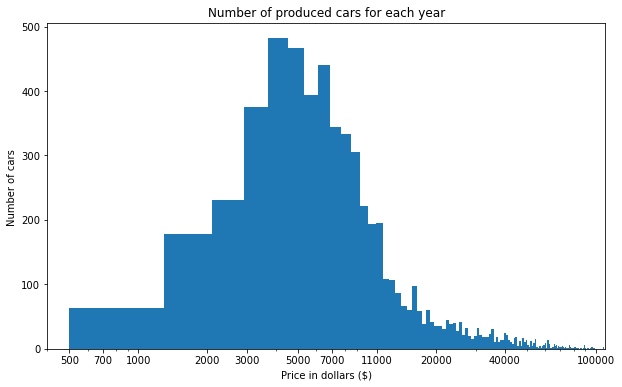

In [31]:
plt.figure(figsize=(10,6))
plt.hist(data=df_new,x='Price_dollar',bins=np.arange(500,df_new.Price_dollar.max(),800))
ticks=[500,700,1000,2000,3000,5000,7000,11000,20000,40000,100000]
label=['{}'.format(p) for p in ticks]
plt.title('Number of produced cars for each year')
plt.ylabel('Number of cars ')
plt.xlabel('Price in dollars ($)')
plt.xscale('log')
plt.xlim(400,110000)
plt.xticks(ticks,label);

In [32]:
orders=df_new.Brand.value_counts().index
first=sb.color_palette()[0]


## "Maruti"&"Hyundai" has wide spread more than the other vehicles , which means they are more popular and their prices compard to other brands will be little 

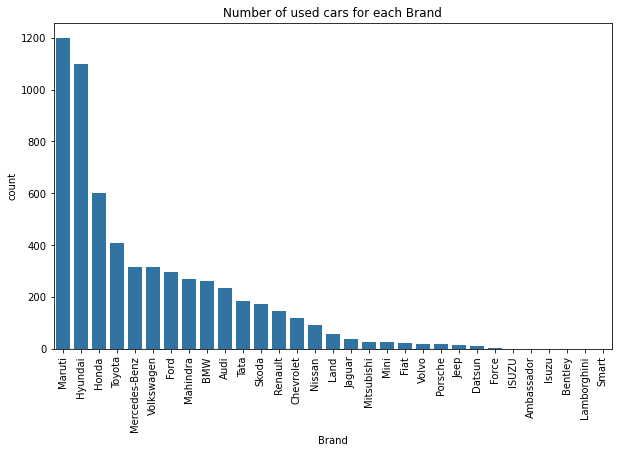

In [33]:
plt.figure(figsize=(10,6))
sb.countplot(data=df_new,x='Brand',color=first,order=orders)
plt.xticks(rotation=90);
plt.title("Number of used cars for each Brand");

## Mumbai & Hyderabad citys have the most number of used cars which means they have differient Brands and popular car market

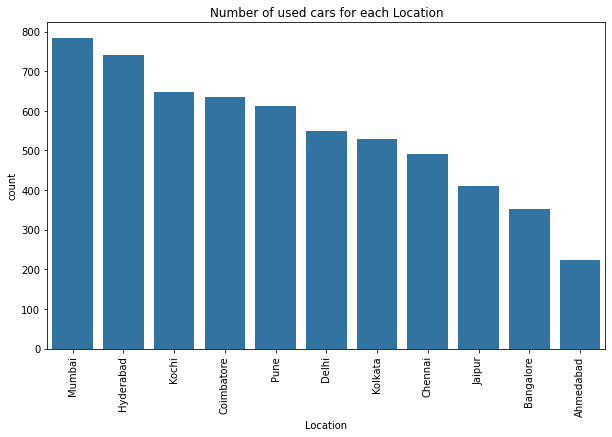

In [34]:
order=df_new.Location.value_counts().index
plt.figure(figsize=(10,6))
sb.countplot(data=df_new,x='Location',color=first,order=order)
plt.xticks(rotation=90);
plt.title("Number of used cars for each Location");

## Here we have a left skweed and most vehicles were produced around  year 2015 

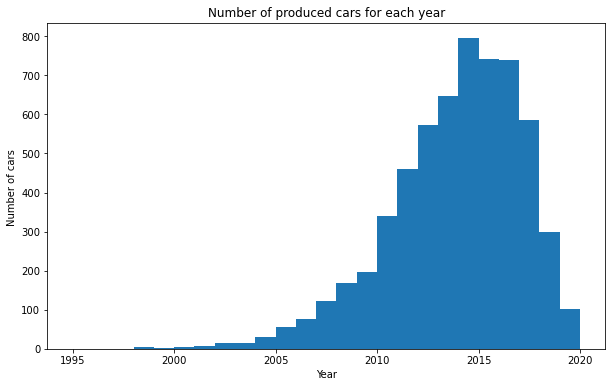

In [35]:
plt.figure(figsize=(10,6))
plt.hist(data=df_new,x='Year',bins=(np.arange(1995,df_new["Year"].max()+2,1)))
plt.title('Number of produced cars for each year')
plt.ylabel('Number of cars ')
plt.xlabel('Year');

In [36]:
df_new.head(1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Mileage(kmpl),Engine(CC),Price_dollar
0,Mumbai,2010,72000,CNG,Manual,First,5.0,Maruti,35.91,998,2401.0


## Most vehicles in the market have engine size between 900-1600 CC

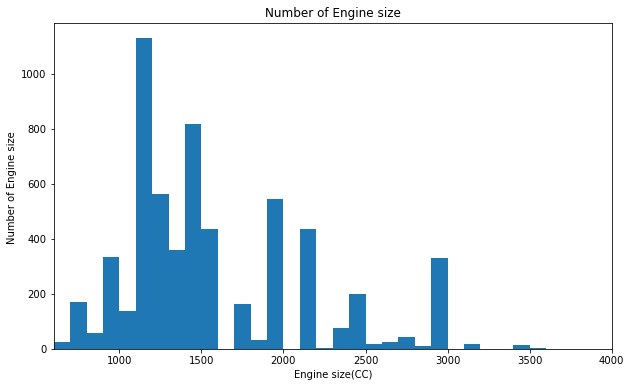

In [37]:
plt.figure(figsize=(10,6))
plt.hist(data=df_new,x="Engine(CC)",bins=np.arange(600,4000,100))
plt.xlim(600,4000)
plt.xlabel("Engine size(CC)")
plt.ylabel("Number of Engine size ")
plt.title("Number of Engine size");

## Diesel & Petrol are the most fuel types used in india

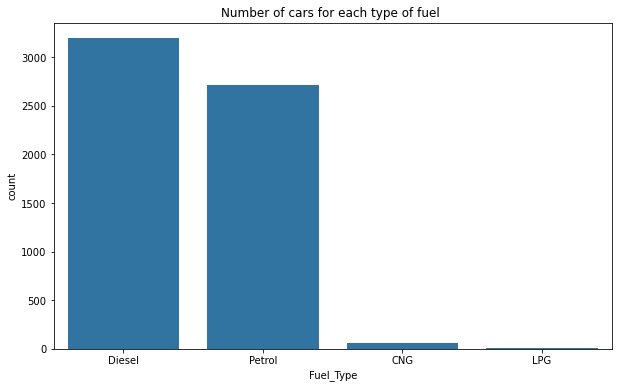

In [38]:
plt.figure(figsize=(10,6))
orders=df_new.Fuel_Type.value_counts().index
first=sb.color_palette()[0]
sb.countplot(data=df_new,x="Fuel_Type",color=first,order=orders);
plt.title("Number of cars for each type of fuel ");

## Manual Transmission is about twice the Automatic Transmissions 

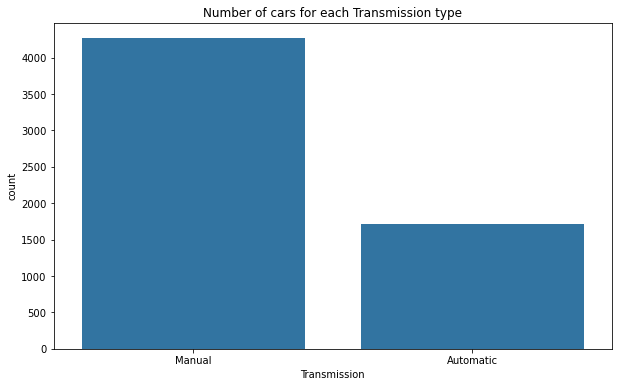

In [39]:
plt.figure(figsize=(10,6))
orders=df_new.Transmission.value_counts().index
first=sb.color_palette()[0]
sb.countplot(data=df_new,x="Transmission",color=first,order=orders);
plt.title("Number of cars for each Transmission type");

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I have discused all the distributions after every plot 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In Price & Engine size columns I limitted my x aixs because there were outliers 


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [40]:
#here i have so little cars cost over 100000 $ so I dealed with them as outliers 
oulier=df_new.query('Price_dollar>100000').index

In [41]:
df_new.drop(oulier,axis=0,inplace=True)

In [42]:
df_new["Price_dollar"].describe()

count     5958.000000
mean     12720.567774
std      14128.332152
min        603.680000
25%       4802.000000
50%       7738.080000
75%      13565.650000
max      98784.000000
Name: Price_dollar, dtype: float64

In [43]:
# I used this correlation function to give me insights about the relation between numurical variables 
df_new.corr()

,Year,Kilometers_Driven,Seats,Mileage(kmpl),Engine(CC),Price_dollar
Year,1.000000,-0.171887,0.013326,0.302603,-0.058970,0.314380
Kilometers_Driven,-0.171887,1.000000,0.082025,-0.063546,0.096001,-0.002696
Seats,0.013326,0.082025,1.000000,-0.305700,0.417394,0.085488
Mileage(kmpl),0.302603,-0.063546,-0.305700,1.000000,-0.586653,-0.312912
Engine(CC),-0.058970,0.096001,0.417394,-0.586653,1.000000,0.662027
Price_dollar,0.314380,-0.002696,0.085488,-0.312912,0.662027,1.000000


# I was investigating on car prices and the main feaeture assosiated with the car price and I found that :
- there is a positive correlation between the engine size and the price of the car
- On average the prices dont change vs Location
- The prices increase with the production year of the car

## there is a positive correlation between the engine size and the price of the car 

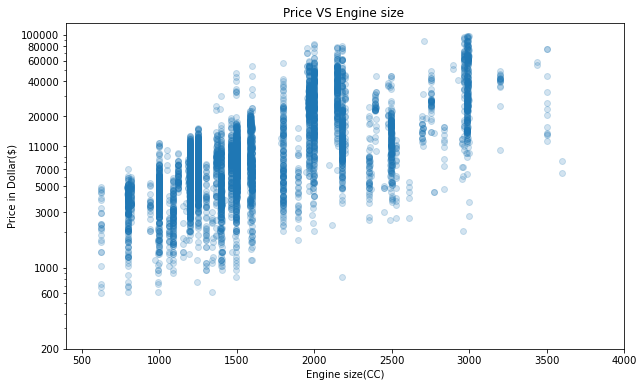

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(data=df_new,x="Engine(CC)",y="Price_dollar",alpha=1/5)
plt.title("Price VS Engine size ")
plt.xlabel("Engine size(CC)")
plt.ylabel("Price in Dollar($)")
ticks=[200,600,1000,3000,5000,7000,11000,20000,40000,60000,80000,100000]
label=['{}'.format(p) for p in ticks]
plt.yscale('log')
plt.xlim(400,4000)
plt.yticks(ticks=ticks,labels=label);

## On average the prices dont change vs Location 

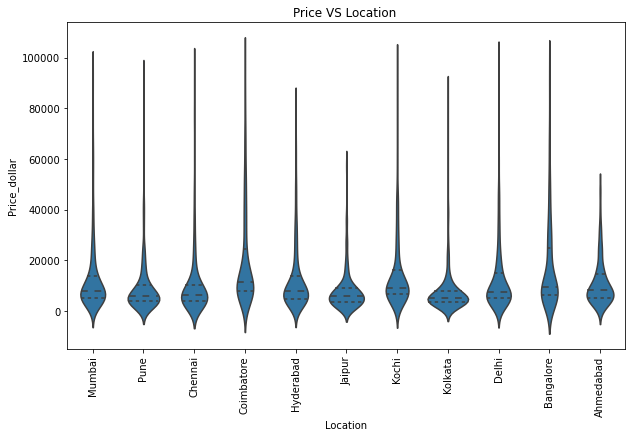

In [45]:
plt.figure(figsize=(10,6))
first=sb.color_palette()[0]
plt.title("Price VS Location ")
sb.violinplot(data=df_new,x="Location",y="Price_dollar",color=first,inner="quartile")
plt.xticks(rotation=90);


## the prices increase with the production year of the car

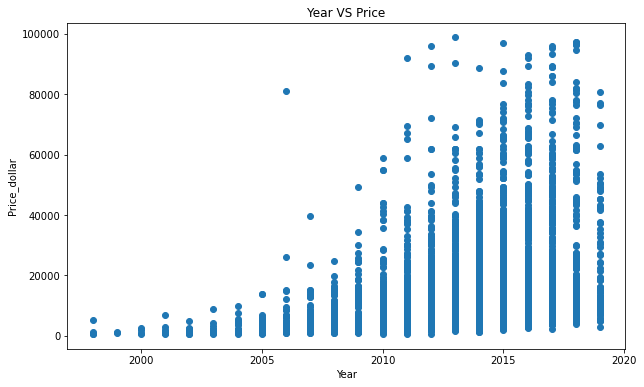

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(data=df_new,x="Year",y="Price_dollar")
plt.title("Year VS Price")
plt.xlabel("Year")
plt.ylabel("Price_dollar");

# I looked for the main features assosiated with the fuel consumption they were all obvious like:
- The bigger the engine the more fuel consumed 


## This plot shows negative correlation between the engine size and the mileage driven by the car,and this is obvious because the bigger the engine the more fuel we need 

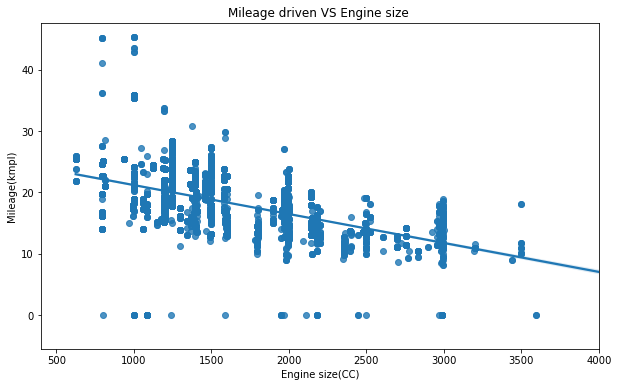

In [47]:
plt.figure(figsize=(10,6))
sb.regplot(data=df_new,x="Engine(CC)",y="Mileage(kmpl)")
plt.title("Mileage driven VS Engine size ")
plt.xlabel("Engine size(CC)")
plt.ylabel("Mileage(kmpl)")
plt.xlim(400,4000);


## this plot says that automatic transmision has lower mileage compard to manual transmision , and this is wered beacuse automatic has higher performance on usual

## Then here I found a strange relation between the transmission type and the fuel consumption which states that automatic consumes more fuel which is opposite to reality , so I looked dip and found that ......

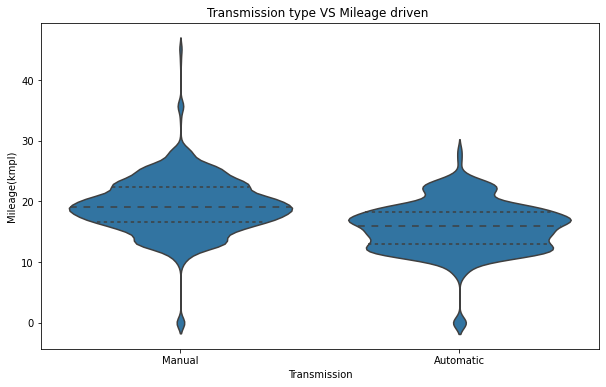

In [48]:
plt.figure(figsize=(10,6))
first=sb.color_palette()[0]
plt.title("Transmission type VS Mileage driven ")
sb.violinplot(data=df_new,x="Transmission",y="Mileage(kmpl)",color=first,inner="quartile");

In [49]:
df_new.Kilometers_Driven.describe()

count    5.958000e+03
mean     5.878650e+04
std      9.165791e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.300050e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

## Manual transmission is popular than automatic 

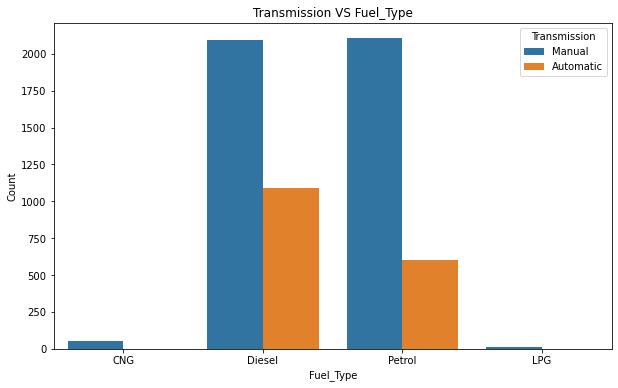

In [50]:
plt.figure(figsize=(10,6))
sb.countplot(data=df_new,x="Fuel_Type",hue="Transmission")
plt.title("Transmission VS Fuel_Type")
plt.xlabel("Fuel_Type")
plt.ylabel("Count");

## The more old the more Kilometers driven

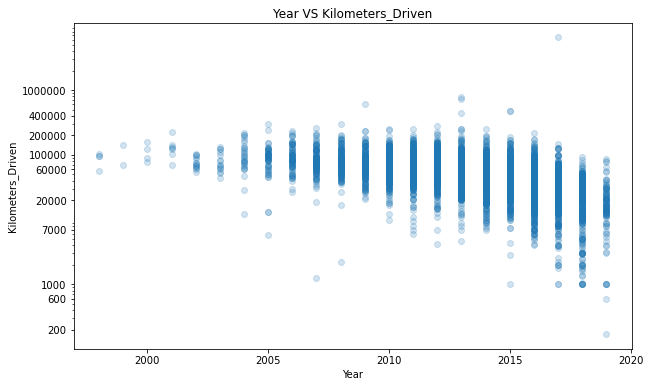

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(data=df_new,x="Year",y="Kilometers_Driven",alpha=1/5)
plt.title("Year VS Kilometers_Driven")
plt.xlabel("Year")
ticks=[200,600,1000,7000,20000,60000,100000,200000,400000,1000000]
label=['{}'.format(p) for p in ticks]
plt.yscale('log')
plt.yticks(ticks=ticks,labels=label);
plt.ylabel("Kilometers_Driven");

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I have discused all the distributions after every plot

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Usually automatic transmision uses little fuel per km compard to manual transmission , but the plot shows the opposit , so I will make more investigation on Multivariate Exploration 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [52]:
df_new.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Mileage(kmpl),Engine(CC),Price_dollar
0,Mumbai,2010,72000,CNG,Manual,First,5.0,Maruti,35.91,998,2401.0
1,Pune,2015,41000,Diesel,Manual,First,5.0,Hyundai,19.67,1582,17150.0


## For the same Engine size, cars with Diesel fuel has more maileage the petrol

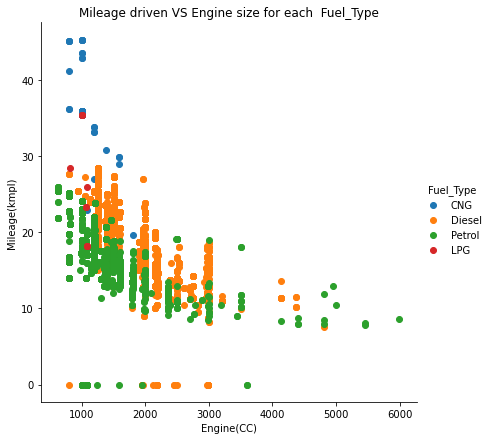

In [53]:
g=sb.FacetGrid(data=df_new,hue="Fuel_Type",height=6)
g.map(plt.scatter,"Engine(CC)","Mileage(kmpl)")
g.add_legend()
plt.title("Mileage driven VS Engine size for each  Fuel_Type");

##  The automatic transmission comes with bigger engine size in my dataset,and we know from the previous relations between engnie size and the maileage that there is a negative correlation , however for the same engine size automatic transmission is better

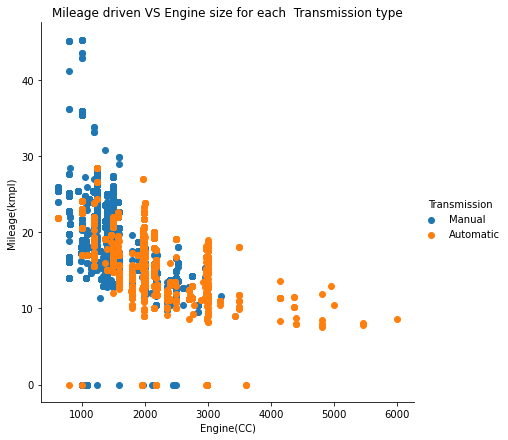

In [54]:
g=sb.FacetGrid(data=df_new,hue="Transmission",height=6)
g.map(plt.scatter,"Engine(CC)","Mileage(kmpl)")
g.add_legend()
plt.title("Mileage driven VS Engine size for each  Transmission type");

In [55]:
df_new.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Mileage(kmpl),Engine(CC),Price_dollar
0,Mumbai,2010,72000,CNG,Manual,First,5.0,Maruti,35.91,998,2401.0
1,Pune,2015,41000,Diesel,Manual,First,5.0,Hyundai,19.67,1582,17150.0


## this plot shows that those cars having small engine size are the best economic cars u can buy 

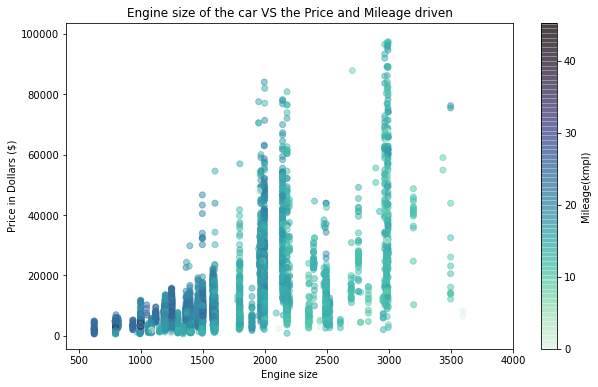

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(data=df_new,x="Engine(CC)",y="Price_dollar",c="Mileage(kmpl)",cmap='mako_r',alpha=1/2)
plt.colorbar(label="Mileage(kmpl)")
plt.xlim(400,4000);
plt.xlabel("Engine size")
plt.ylabel("Price in Dollars ($)");
plt.title("Engine size of the car VS the Price and Mileage driven");


# In Concloustion:
- Indian car market isn't expensive due to the average cost of the cars are around 6000 dollar
- Diesel fuel type is more popular in the Indian market and it more efficient than Petrol
- Cars with manual transmission is about twice cars with automatic transmission
- Price has positive correlation with Engine size of the car, and the mileage has negative correlation with engine size so if we want to buy an economic car we will focus on cars with small engines as they have low price and high mileage, so we will also reduce our fuel consumption 